In [3]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import cross_val_score
import os

In [4]:
#load data
yelp = pd.read_csv('data/smalldata.csv')
yelp.info

<bound method DataFrame.info of                                                  content  rating  reservation  \
0      Burger & Lobster has become one of those "we c...     4.0          NaN   
1      Been here few years ago. Enjoy the lobster mea...     4.0          NaN   
2      This place is awesome!!! All of their entree c...     5.0          NaN   
3      Finally got around to trying this popular spot...     3.0          NaN   
4      Simple idea and great food sums it up for Lobs...     4.0          NaN   
5      I'm not sure what happened to my beloved B&L b...     2.0          NaN   
6      Here we go! This is hands down one of the most...     5.0          NaN   
7      Excellent for the second time, nice lunch on O...     4.0          NaN   
8      With two staples to their menu, I had much hig...     2.0          NaN   
9      This place has been one of the places I have b...     3.0          NaN   
10     This was our first meal when we arrived to NYC...     3.0          NaN

In [5]:
#show the data structure
rating_count = yelp['rating'].value_counts()
print rating_count
yelp_r = yelp.sample(frac=1)

3.0    7000
5.0    7000
1.0    7000
2.0    7000
4.0    7000
Name: rating, dtype: int64


In [6]:
#select samples which rating are 1, 3 and 5, x is review text, y is rating label
yelp_class = yelp[(yelp['rating'] == 1) | (yelp['rating'] == 3) | (yelp['rating'] == 5)]
X = yelp_class['content']
y = yelp_class['rating']
print type(X)

<class 'pandas.core.series.Series'>


In [10]:
#word to vector in bag of word
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = 'word',lowercase = True, stop_words = 'english', binary= True)
bow_transformer = bow_transformer.fit(X)
print  len(bow_transformer.vocabulary_)
X_vec = bow_transformer.transform(X)
print X_vec.shape

31861


(21000, 31861)


In [11]:
#a example of verctorizer
review_25 = X[24]
print review_25
bow_25 = bow_transformer.transform([review_25])
print bow_25

Love love love!! A lobster dinner for $20 in NYC?! This place is awesome. The food is cheap by most standards but high quality. Get the lobster grilled and get the lemon garlic butter sauce.
  (0, 254)	1
  (0, 2548)	1
  (0, 4573)	1
  (0, 5463)	1
  (0, 8507)	1
  (0, 11405)	1
  (0, 12065)	1
  (0, 12792)	1
  (0, 13577)	1
  (0, 16312)	1
  (0, 16615)	1
  (0, 16808)	1
  (0, 19349)	1
  (0, 21254)	1
  (0, 22406)	1
  (0, 24414)	1
  (0, 26820)	1


In [12]:
#show the vector to word
print 'this word is: ' + (bow_transformer.get_feature_names()[16808])

this word is: love


In [13]:
#classify by multinomial Naive Bayes
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
X_train, X_test,y_train, y_test = train_test_split(X_vec, np.array(y), test_size=0.2, random_state=101)

nb = MultinomialNB(alpha=1)
nb.fit(X_train, y_train)
acc = nb.score(X_test,y_test)
scores = cross_val_score(nb, X_vec, y, cv=5)
y_pred = nb.predict(X_test)
print confusion_matrix(y_pred,y_test)
print acc
print np.mean(scores)
os.system('say "program done"')

[[1121  168   29]
 [ 234 1106  150]
 [  23  135 1234]]
0.824047619048
0.761047619048


0

In [11]:
from sklearn.neural_network import MLPClassifier

In [1]:
#classify by Neural network
from sklearn.neural_network import MLPClassifier 
my_mlp = MLPClassifier(solver = 'lbfgs', alpha = 0.001, hidden_layer_sizes = (15, 3), activation = 'tanh')
my_mlp.fit(X_train, y_train)
acc = my_mlp.score(X_test,y_test)
scores = np.mean(cross_val_score(my_mlp, X_vec, y, cv=5))
print acc,scores
os.system('say "program done"')

In [20]:
#classify by adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
my_adb = AdaBoostClassifier(MultinomialNB(alpha= 1),n_estimators=52,learning_rate=1)
my_adb.fit(X_train, y_train)
acc = my_adb.score(X_test,y_test)
scores = np.mean(cross_val_score(my_adb, X_vec, y, cv=10))
print acc, scores
os.system('say "program done"')

0.803333333333 0.798904761905


0

In [21]:
#code for parameter optimization
yelp_ran = yelp.sample(frac=1)
optimal_train = yelp_ran[0:2100]
yelp_class = optimal_train[(optimal_train['rating'] == 1) | (optimal_train['rating'] == 3) | (optimal_train['rating'] == 5)]
x_opt = yelp_class['content']
y_opt = yelp_class['rating']
x = bow_transformer.transform(x_opt)
from sklearn.ensemble import RandomForestClassifier
numlt = []
acclt = []
lrate = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,3,4,5]
for i in lrate:
    my_rdf = MultinomialNB(alpha=i)
    my_rdf.fit(x, y_opt)
    scores = np.mean(cross_val_score(my_rdf, x, y_opt, cv=10))
    numlt.append(i)
    acclt.append(scores*100)
print acclt
print lrate
os.system('say "program done"')

[64.817726272588033, 65.369561362969165, 65.997665989425741, 67.495632813340194, 70.184046761596647, 74.206247474879589, 73.093290664248372, 71.20028601076028, 70.097807541499179, 69.463511828463311, 68.359841647701032]
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5]


0

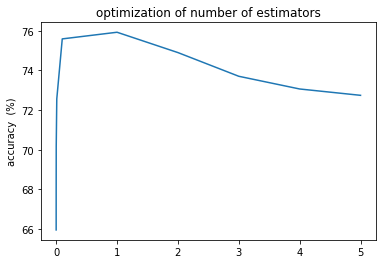

[65.951460502921009, 66.433395986791965, 67.944607569215137, 70.171424942849882, 72.560177800355603, 75.592156464312936, 75.928011176022352, 74.901838963677918, 73.705557531115062, 73.064297688595374, 72.744297688595381]


In [50]:
plt.plot(lrate, acclt)
plt.title( 'optimization of number of estimators')
plt.ylabel('accuracy  (%)')
plt.show()
print acclt

In [ ]:
#classify by Random Forest
from sklearn.ensemble import RandomForestClassifier
my_rdf = RandomForestClassifier(criterion= 'entropy',max_depth=55,n_estimators=260, max_features= 145) #max_depth is the depth of each
#tree, n_estimator is the number of decision trees, max_feature is the number of candidate feature
my_rdf.fit(X_vec, y)#training
scores = np.mean(cross_val_score(my_rdf, X_vec, y, cv=10))#10 folder cross-validation (mean)
print scores
importance = my_rdf.feature_importances_  #get importance ranking

importance_ind = [] #store ranking list
for i in range(importance.shape[0]):
    row = []
    row.append(i)
    imp = importance[i]
    row.append(imp)
    importance_ind.append(row)
importance2 = np.array(importance_ind)
#print importance2
idex=np.lexsort([-1*importance2[:,1]])
importance_sort=importance2[idex,:]
print(importance_sort.shape,importance_sort) #importance_sort is the importance ranking list. in each row, first number
#is the index of features, and second number is the importance value.

os.system('say "program done"')

In [58]:
# use importance ranking from random forest
importance = my_rdf.feature_importances_
print type(importance),importance.shape

<type 'numpy.ndarray'> (31861,)


In [59]:
#sort feature importance
importance_ind = []
for i in range(importance.shape[0]):
    row = []
    row.append(i)
    imp = importance[i]
    row.append(imp)
    importance_ind.append(row)
importance2 = np.array(importance_ind)
#print importance2
idex=np.lexsort([-1*importance2[:,1]])
importance_sort=importance2[idex,:]
print importance_sort.shape,importance_sort


(31861, 2) [[  8.04500000e+03   1.15415986e-02]
 [  1.61400000e+03   9.22827761e-03]
 [  2.40440000e+04   8.30912761e-03]
 ..., 
 [  3.18470000e+04   0.00000000e+00]
 [  3.18550000e+04   0.00000000e+00]
 [  3.18570000e+04   0.00000000e+00]]


In [92]:
#show the 1000 most important words
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
import matplotlib.pyplot as plt
print  importance_sort
wordimpsort = []
wordcloud_dct = {}
for i in range(1000):
     ind = importance_sort[i,0]
     word = bow_transformer.get_feature_names()[int(ind)]
     wordimpsort.append(word.encode('utf-8'))
     wordcloud_dct[str(word.encode('utf-8'))] = float(importance_sort[i,1])
print wordimpsort



[[  8.04500000e+03   1.15415986e-02]
 [  1.61400000e+03   9.22827761e-03]
 [  2.40440000e+04   8.30912761e-03]
 ..., 
 [  3.18470000e+04   0.00000000e+00]
 [  3.18550000e+04   0.00000000e+00]
 [  3.18570000e+04   0.00000000e+00]]


['delicious', 'amazing', 'rude', 'great', 'good', 'asked', 'best', 'perfect', 'worst', 'ok', 'bit', 'definitely', 'told', 'overall', 'terrible', 'horrible', 'pretty', 'bad', 'favorite', 'okay', 'love', 'manager', 'friendly', 'wasn', 'nice', 'didn', 'decent', 'said', 'bland', 'little', 'money', 'excellent', 'average', 'stars', 'left', 'awesome', 'like', 'loved', 'perfectly', 'customers', 'better', 'fantastic', 'customer', 'tasty', 'try', 'attitude', 'maybe', 'minutes', 'recommend', 'spot', 'just', 'really', 'don', 'mediocre', 'ordered', 'food', 'highly', 'pork', 'flavorful', 'disappointing', 'awful', 'disappointed', 'poor', 'called', 'disgusting', 'took', 'cheese', 'order', 'restaurant', 'waitress', 'service', 'think', 'atmosphere', 'attentive', 'came', 'place', 'did', 'sauce', 'table', 'wait', 'fresh', 'waiter', 'waste', 'time', 'quite', 'wouldn', 'super', 'waited', 'chicken', 've', 'flavor', 'people', 'perfection', 'probably', 'way', 'price', 'fried', 'overpriced', 'got', 'cold', 'unf

In [92]:
#split reviews into 3 rating documents, prepare for TF-IDF
from __future__ import division, unicode_literals 
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  
import os
yelp_text = yelp.loc[:,['rating','content']]
corpus=[]
rating1 = ''
rating3 = ''
rating5 = ''
for i, item in yelp_text.iterrows():
    item_dict = item.to_dict()
    #print item_dict["rating"]
    if int(item_dict["rating"]) == 1:
        rating1 = rating1 + ' ' + item_dict["content"].decode('utf-8')
    if int(item_dict["rating"]) == 3:
        rating3 = rating3 + ' ' + item_dict["content"].decode('utf-8')
    if int(item_dict["rating"]) == 5:
        rating5 = rating5 + ' ' + item_dict["content"].decode('utf-8')
   
print len(rating1),len(rating3),len(rating5)
print rating1[1:500]

corpus.append(rating1)
corpus.append(rating3)
corpus.append(rating5)
print len(corpus)
# vectorizer = CountVectorizer(analyzer = 'word',lowercase = True, stop_words = 'english')
# transformer=TfidfTransformer()
# tfidf=transformer.fit_transform(vectorizer.fit_transform(corpus))
# weight=tfidf.toarray()

os.system('say "program done"')

5357268 5514532 4511810
Tbh this is place is so overpriced. The food is mediocre. The customer service is shitty. The fries are over salted (so ask for no salt) tbh, HARD PASS. $27 for 1 meal? Lmao no thank you. I mean maybe go there for an Instagram pic but that's it. Those who give it 2 or more stars have a wooden tongue! Their entrees have no sort of taste to it.. Their Lobster rolls was NOT to crave or rave on about. And their Burger was the same. Will not return there.. Also, they do not serve Corona's!! What pla
3


0

In [109]:
#without RF
vectorizer = CountVectorizer(analyzer = 'word',lowercase = True, stop_words = 'english')
transformer=TfidfTransformer()
tfidf=transformer.fit_transform(vectorizer.fit_transform(corpus))
weight=tfidf.toarray()

In [115]:
#calculate TF-IDF with RF
transformer=TfidfTransformer(smooth_idf = True, sublinear_tf = True)
tfidf=transformer.fit_transform(bow_transformer.fit_transform(corpus))
weight=tfidf.toarray()
print weight.shape


(3, 31861)


In [131]:
#rank TF-IDF with RF
weight_sls = np.zeros(shape=(3,)) 
weight_index = np.zeros(shape=(1,))
for i in range(500):
     ind = importance_sort[i,0]
     weight_index = np.column_stack((weight_index,ind))
     weight_sls = np.column_stack((weight_sls, weight[:,int(ind)]))
     w = weight[:,int(ind)]
weight_sls = np.concatenate((weight_sls, weight_index))
weight_sls = np.delete(weight_sls,0,axis=1)
print weight_sls.shape

dct = {}
for i in range(weight_sls.shape[0]-1):
    dct['weight_rating%s' % i] = []
for i in range(weight_sls.shape[0]-1):  
    for j in range(weight_sls.shape[1]):
        row = []
        row.append(int(weight_sls[3,j]))
        row.append(weight_sls[i,j])
        
        dct['weight_rating%s' % i].append(row)
rating1_lt = dct['weight_rating0']
rating3_lt = dct['weight_rating1']
rating5_lt = dct['weight_rating2']
rating1_ar = np.array(rating1_lt)
rating3_ar = np.array(rating3_lt)
rating5_ar = np.array(rating5_lt)

idex1=np.lexsort([-1*rating1_ar[:,1]])
rating1_sort=rating1_ar[idex1,:]

idex3=np.lexsort([-1*rating3_ar[:,1]])
rating3_sort=rating3_ar[idex3,:]

idex5=np.lexsort([-1*rating5_ar[:,1]])
rating5_sort=rating5_ar[idex5,:]
print 'done'

done


In [105]:
#rank TF-IDF without RF
dct = {}
for i in range(weight.shape[0]):
    dct['weight_rating%s' % i] = []
for i in range(weight.shape[0]):  
    for j in range(weight.shape[1]):
        row = []
        row.append(j)
        row.append(weight[i,j])
        dct['weight_rating%s' % i].append(row)

rating1_lt = dct['weight_rating0']
rating3_lt = dct['weight_rating1']
rating5_lt = dct['weight_rating2']
rating1_ar = np.array(rating1_lt)
rating3_ar = np.array(rating3_lt)
rating5_ar = np.array(rating5_lt)

idex1=np.lexsort([-1*rating1_ar[:,1]])
rating1_sort=rating1_ar[idex1,:]

idex3=np.lexsort([-1*rating3_ar[:,1]])
rating3_sort=rating3_ar[idex3,:]

idex5=np.lexsort([-1*rating5_ar[:,1]])
rating5_sort=rating5_ar[idex5,:]
print 'done'

done


In [1]:
#show 1 star TF-IDF
wordsort = []
for i in range(100):
     ind = rating1_sort[i,0]
     word = bow_transformer.get_feature_names()[int(ind)].encode('utf-8')
     if word in wordimpsort:
        wordsort.append(word)
print wordsort


In [1]:
#show 3 star TF-IDF
wordsort = []
for i in range(100):
     ind = rating3_sort[i,0]
     wordsort.append(bow_transformer.get_feature_names()[int(ind)])
print wordsort

In [1]:
#show 5 star TF-IDF
wordsort = []
for i in range(200):
     ind = rating5_sort[i,0]
     wordsort.append(bow_transformer.get_feature_names()[int(ind)].encode('utf-8'))
print wordsort


(1, 31861) (21001, 31861)


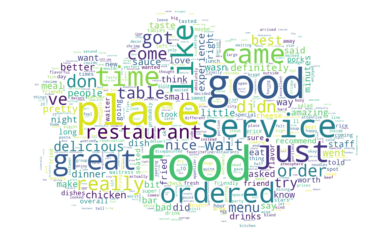

In [18]:
#draw a word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
import matplotlib.pyplot as plt
X2 = X_vec.todense()
X_sum = X2.sum(axis=0)
X3 = np.concatenate((X2, X_sum))
print X_sum.shape, X3.shape
sum_ind = []

for i in range(X_sum.shape[1]):  
    row = []
    row.append(i)
    row.append(X_sum[0,i])
    sum_ind.append(row)

sum_ary = np.array(sum_ind)

idex=np.lexsort([-1*sum_ary[:,1]])
sum_sort=sum_ary[idex,:]

wordcloud_dct = {}
wordsort = []
for i in range(500):
     ind = sum_sort[i,0]
     word = bow_transformer.get_feature_names()[int(ind)]
     wordsort.append(word)
     wordcloud_dct[str(word.encode('utf-8'))] = int(sum_sort[i,1])

d = path.dirname('/Users/chiyuzhang/PycharmProjects/yelp/')
qua_mask = np.array(Image.open(path.join(d, "cloud.jpeg")))
wordcloud = WordCloud(background_color="white",prefer_horizontal=0.9,  max_words=500, mask=qua_mask)
wordcloud.generate_from_frequencies(wordcloud_dct)
wordcloud.to_file(path.join(d, "yelp_review.png"))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [24]:
#Using M one-to-rest classifiers to classify multi-class problem(basic classifier can be change in the function)
def multiclassify1(x,y,x_test,y_test):
    y_ary = np.array(y)
    labels = np.zeros(shape=(y_ary.shape[0],5))
    for j in range(5):
        classnum = j+1
        globals()['train_y%s' %classnum] = np.zeros(shape=(y_ary.shape[0],)) 
        for i in range(y_ary.shape[0]):
            classlb = int(y_ary[i])
            if classlb == classnum:
                globals()['train_y%s' %classnum][i] = 1
            else:
                globals()['train_y%s' %classnum][i] = 0
        
        globals()['mnb%s' %classnum] = MLPClassifier(solver = 'lbfgs', alpha = 0.1, hidden_layer_sizes = (15, 5))
        globals()['mnb%s' %classnum].fit(x, globals()['train_y%s' %classnum])
        y_pred = globals()['mnb%s' %classnum].predict(x)
        labels[:,j] = y_pred
        
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier()
    clf = clf.fit(labels, y)
    
    labels_test = np.zeros(shape=(x_test.shape[0],5))
    for h in range(5):
        classnum = h+1
        y_pred = globals()['mnb%s' %classnum].predict(x_test)
        labels_test[:,h] = y_pred
    
    finaltest = clf.predict(labels_test)  
    errors = np.array([ y_i != y_p for y_i, y_p in zip(finaltest, y_test)])
    agreements = [0 if e else 1 for e in errors]
    acc = float(sum(agreements))/x_test.shape[0]
    return acc


In [25]:
#for five-class classifiction problem, use M one-to-rest classifiers to classify multi-class problem
X_train, X_test,y_train, y_test = train_test_split(X_vec, np.array(y), test_size=0.2)
print multiclassify1(X_train,y_train,X_test,y_test)

0.797142857143


In [27]:
# Using M(M-1)/2 pair-wise classifiers with majority voting
yelp_ran = yelp.sample(frac=1)
test = yelp_ran[0:3500]
train = yelp_ran[3500:]
x_all = train['content']
y_all = train['rating']
x_allvec = bow_transformer.transform(x_all)
labels = np.zeros(shape=(x_allvec.shape[0],10))
count = 0
for i in range(1,6):
    for j in range(1,i):
        yelp_class = train[(train['rating'] == i) | (train['rating'] == j)]
        x_1v1 = yelp_class['content']
        y = yelp_class['rating']
        x = bow_transformer.transform(x_1v1)
        globals()['mnb%s%s' %(i,j)] = MLPClassifier(solver = 'lbfgs', alpha = 0.1, hidden_layer_sizes = (15, 5))
        globals()['mnb%s%s'  %(i,j)].fit(x, y)
        y_pred = globals()['mnb%s%s'  %(i,j)].predict(x_allvec)
        labels[:,count] = y_pred
        count += 1
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(labels, y_all)

count = 0
x_test = test['content']
y_test = test['rating']
y = np.array(y_test)
x_testvec = bow_transformer.transform(x_test)
labels_test = np.zeros(shape=(x_testvec.shape[0],10))
for i in range(1,6):
    for j in range(1,i):
        y_pred = globals()['mnb%s%s'  %(i,j)].predict(x_testvec)
        labels_test[:,count] = y_pred
        count += 1

finaltest = clf.predict(labels_test) 
errors = np.array([ y_i != y_p for y_i, y_p in zip(finaltest, y)])
agreements = [0 if e else 1 for e in errors]
acc = float(sum(agreements))/x_test.shape[0]
print acc

0.534
